# 고양이 수염 스티커 만들기

평가문항

1. 자기만의 카메라앱 기능 구현을 완수하였다.	얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다.	정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.	얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

In [8]:
# Step 1. 스티커 구하기 or 만들기

# https://www.crcv.ucf.edu/data/Selfie/


3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
4.10.0
1.26.4
19.24.0


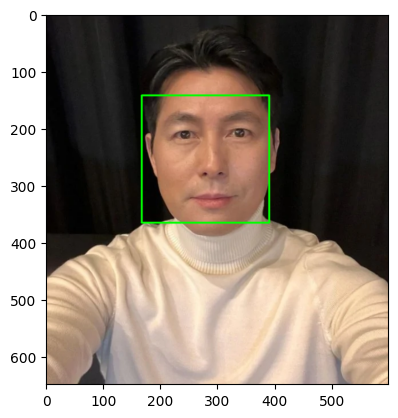

68


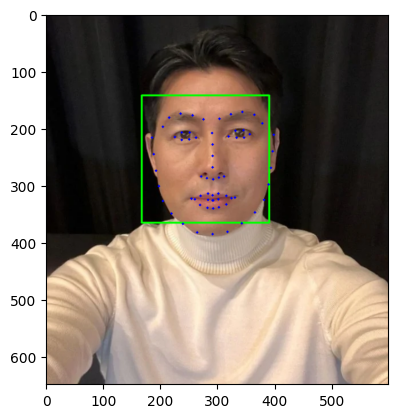

In [46]:
# Step 2. 얼굴 검출 & 랜드마크 검출 하기
# 오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.


# dlib 설치 https://becoming-linchpin.tistory.com/51
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib


print(sys.version)
print(cv2.__version__)
print(np.__version__)
print(dlib.__version__)

# my_image_path = 'aiffel/camera_sticker/images/image.png' # 본인 이미지가 있는 경로를 가지고 온다.
my_image_path = "./images/selfie.png"  # 본인 이미지가 있는 경로를 가지고 온다.


img_bgr = cv2.imread(my_image_path)  # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()  # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
# plt.show()


img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
# plt.show()


detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

# 원소가 1개이므로 아래 반복문은 한번만 실행됨
for dlib_rect in dlib_rects:  # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()  # 왼쪽
    t = dlib_rect.top()  # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom()  # 아래쪽
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGRA2RGBA)
plt.imshow(img_show_rgb)
plt.show()


model_path = "./models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []  # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
# 원소가 1개이므로 아래 반복문은 한번만 실행됨
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
    # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
# 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
# 각 원소는 68개의 랜드마크 위치가 나열된 list
# list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생


# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (255, 0, 0), -1)
        # cv2.circle: OpenCV의 원을 그리는 함수
        # img_show 이미지 위 각각의 point에
        # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGRA2RGBA)
plt.imshow(img_show_rgb)
plt.show()

In [43]:
# --------------------------------
# Step 3. 스티커 적용 위치 확인하기
# 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.
# --------------------------------


nose_index = 30

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
# for loop 1회만 실행됨
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 코의 index는 30 입니다
    print(landmark[nose_index])

    # 이미지에서 코 부위의 x값
    x = landmark[nose_index][0]

    # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2
    # y = landmark[nose_index][1] - dlib_rect.height() // 2

    y = landmark[nose_index][1] + dlib_rect.height() // 2

    # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    w = h = dlib_rect.width()

    print(f"(x,y) : ({x},{y})")
    print(f"(w,h) : ({w},{h})")


sticker_path = "./images/cat-whiskers.png"

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)


# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2  # 437 - (187//2) = 437-93 = 344
refined_y = y - h  # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print(f"(x,y) : ({refined_x},{refined_y})")  # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.


# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[
        -refined_y:, :
    ]  # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print(f"(x,y) : ({refined_x},{refined_y})")


# Step 4. 스티커 적용하기
# (1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

# (2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.


# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨

sticker_area = img_show[
    refined_y : refined_y + img_sticker.shape[0],
    refined_x : refined_x + img_sticker.shape[1],
]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.


img_show[
    refined_y : refined_y + img_sticker.shape[0],
    refined_x : refined_x + img_sticker.shape[1],
] = np.where(img_sticker[..., 3:] == 0, sticker_area, img_sticker).astype(np.uint8)
# ] = np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

print("슝~")

# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGRA2RGBA))
plt.show()

(291, 268)
(x,y) : (291,380)
(w,h) : (224,224)
(224, 224, 4)
(x,y) : (179,156)
(x,y) : (179,156)


ValueError: operands could not be broadcast together with shapes (224,224,1) (224,224,3) (224,224,4) 

In [6]:
# Step 5. 문제점 찾아보기
# (1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

# (2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

# 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

# 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
# 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
# 실행 속도가 중요할까요?
# 스티커앱을 만들 때 정확도가 얼마나 중요할까요?


In [ ]:
# 회고